Linear Regression

In [2]:
%matplotlib inline
%pip install d2l
import math
import time
import numpy as np
import tensorflow as tf
from d2l import tensorflow as d2l

Note: you may need to restart the kernel to use updated packages.


2024-05-04 07:47:00.212927: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-04 07:47:00.216216: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-04 07:47:00.260078: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-04 07:47:01.169403: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
n = 10000
a = tf.ones(n)
b = tf.ones(n)

In [4]:
c = tf.Variable(tf.zeros(n))
t = time.time()
for i in range(n):
    c[i].assign(a[i] + b[i])
f'{time.time() - t:.5f} sec'

'8.96914 sec'

In [5]:
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec'

'0.00051 sec'

In [6]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * ( x - mu / sigma)**2 / sigma**2)


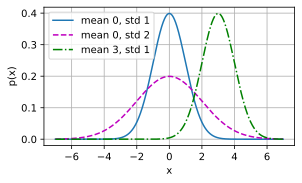

In [7]:
x = np.arange(-7, 7, 0.01)

prams = [(0, 1), (0, 2), (3, 1)]

d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in prams], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in prams]
         )

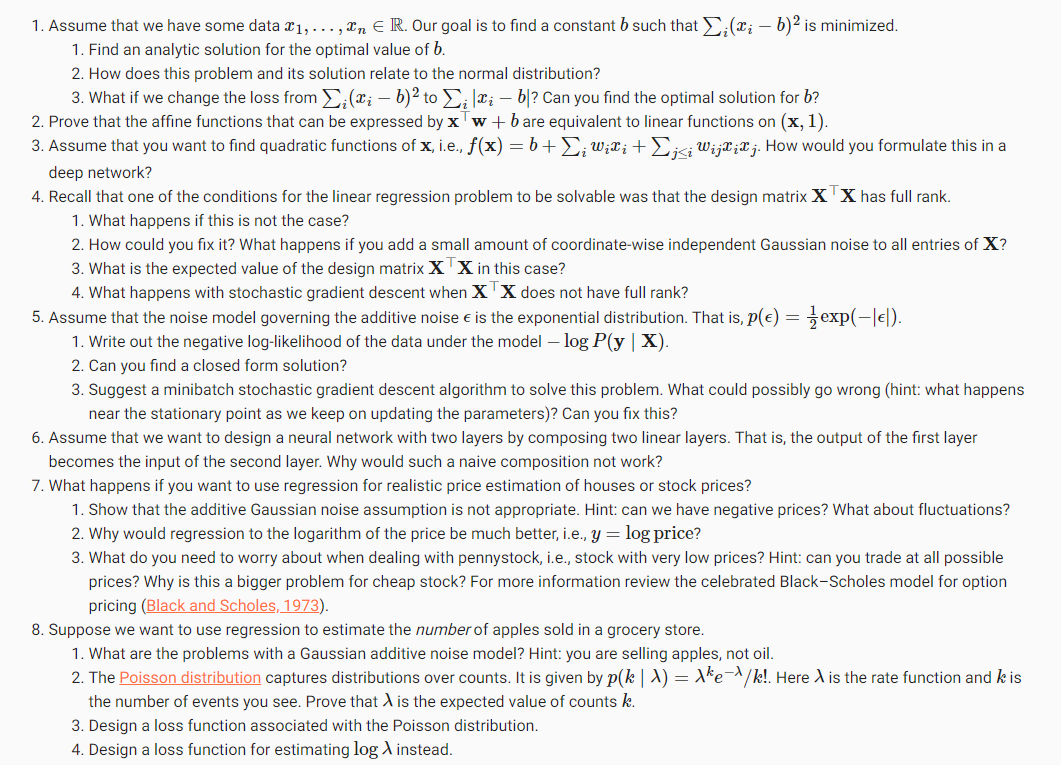

In [8]:
from IPython.display import Image
Image(filename='/workspaces/Machine-Learning-Model/Dive_Into_DL/Chapter_3/Screenshot 2024-05-03 224626.png') 

<div class="alert alert-block alert-info" >
<b>Bài 1: </b><br>
    1. solving for xi = b <br>
    2. if xi=b then normal equation becomes 1/rootof(2 * pi * sigma^2) * exp(0)  == 1/rootof(2 * pi * sigma^2) <br> 
    3. 
    
</div>


In [10]:
%pip install torch torchvision
import torch
def ex2_affine(w, x, b):
    result_by_affine = torch.mm(x.T,w)+b
    print("result_by_affine:\n",result_by_affine)
def ex2_linear(w, x, b):
    b_in_row = torch.ones(x.shape[1]).unsqueeze(0)
    x_and_one = torch.cat((x,b_in_row),0)
    w_and_b = torch.cat((w,torch.tensor([b]).unsqueeze(0)),0)

    result_by_linear = torch.mm(x_and_one.T, w_and_b)
    print("result_by_linear:\n",result_by_linear)
    
w = torch.tensor([1.,2.]).unsqueeze(1)
x = torch.randn([2,3])
b = 3.
ex2_affine(w,x,b)
ex2_linear(w,x,b)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 50.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 3.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 8.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 8.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: triton
    Found existing installation: triton 2.2.0
    Uninstalling triton-2.2.0:
      Successfully uninstalled triton-2.2.0
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.19.3
    Uninstalling nvidia-nccl-cu12-2.19.3:
      Successfully uninstalled nvidia-nccl-cu12-2.19.3
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1
    Uninstalling torch-2.2.1:
      Successfully uninstalled torch-2.2.1
Note: you may need to restart the kernel to use updated packages.
result_by_affine:
 tensor([[3.2895],
        [1.1639],
        [1.2518]])
resu

In [18]:

#u can change the values of x and y as u may like
#alp or learning rate also has the impact to the function, so adjust it properly

y = tf.random.normal([12], 0, 1, tf.float32)
x = np.arange(12)

def minibatch(y,x,alp):

   w = 1
   b = 0
   z = np.array([])
   while True:
    out = np.sum(x*(w*x + b - y))
    out2 = np.sum(w*x + b - y)
    w1 = w - (alp/len(x))*out
    b1 = b - (alp/len(x))*out2

    if np.abs((w1-w)/w1) < 0.00001 and np.abs((b1-b)/b1) < 0.00001:  
        return w,b,z

    else:
        print(b)
        z = np.append(z,b)
        w = w1
        b = b1


0
-0.005846583048502604
-0.011440748850504556
-0.016793323516845704
-0.021914669354756673
-0.026814703941345216
-0.03150291919708252
-0.03598840077718099
-0.04027984396616618
-0.04438557147979736
-0.04831354840596517
-0.052071399052937825
-0.05566642030080159
-0.059105596224466955
-0.06239561112721761
-0.06554286321004231
-0.06855347569783528
-0.07143330923716226
-0.07418797334035236
-0.07682283687591551
-0.07934303840001422
-0.0817534960110982
-0.08405891688664752
-0.08626380650202431
-0.08837247673670448
-0.09038905509312944
-0.0923174920082092
-0.09416156752904253
-0.09592490069071449
-0.0976109547615051
-0.09922304471333819
-0.100764343102773
-0.10223788674672442
-0.10364658196767168
-0.10499321047465003
-0.10628043460845944
-0.10751080258687334
-0.10868675343195594
-0.10981062165896094
-0.11088464140892025
-0.1119109508991241
-0.11289159687360123
-0.11382853833834325
-0.11472365021705622
-0.11557872684796645
-0.1163954857985178
-0.11717557104428603
-0.11792055567105604
-0.11863194

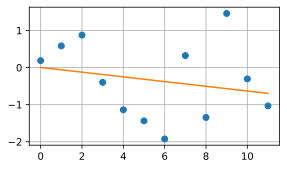

In [23]:
import matplotlib.pyplot as plt
w,b,z= minibatch(y,x, 0.001)
plt.plot(x,y,'o')
plt.plot(x, w*x+b)
plt.grid()
plt.show()